<h1>Fashion-MNIST Project </h1>


<h4>Project Overview
<h4p

>

<p>This project will guide you through building a convolutional neural network (CNN) to classify images from the Fashion MNIST dataset using PyTorch. We'll learn how to:</p>
<ol>
    <li>Load and preprocess the Fashion MNIST dataset</li>
    <li>Create a custom Dataset class</li>
    <li>Build a CNN model with PyTorch</li>
    <li>Train and evaluate the model</li>
    <li>Visualize the results</li>
</ol>

<h3>Environment Setup</h3>

First, let's install the required packages:
<ul>
    <li>PyTorch: For building and training neural networks</li>
    <li>Torchvision: For computer vision datasets and transformations</li>
    <li>Matplotlib: For visualizing images and results</li>
</ul>

In [1]:
# Install required packages
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

<h3>Import Necessary Modules</h3>

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from PIL import Image

<h3>Prepare the Dataset</h3>

<h4>Understanding the Dataset</h4>
<p>Fashion MNIST is a dataset of Zalando's article images consisting of:</p>
<ul>
    <li>60,000 training examples</li>
    <li>10,000 test examples</li>
    <li>10 classes (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)</li>
    <li>28x28 grayscale images</li>
</ul>

<p>Let's define a function to visualize samples:</p>

In [3]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('Class: ' + str(data_sample[1]))
    plt.show()

<h4>Creating Dataset Objects</h4>

<p>We'll create a custom Dataset class with transformations:</p>

In [4]:
# Define image size and transformations
IMAGE_SIZE = 16

composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize images
    transforms.ToTensor()  # Convert to tensor
])

# Create training and validation datasets
dataset_train = dsets.FashionMNIST(
    root='.fashion/data',
    train=True,
    transform=composed,
    download=True
)

dataset_val = dsets.FashionMNIST(
    root='.fashion/data',
    train=False,
    transform=composed,
    download=True
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 266kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.98MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.28MB/s]


<h4>Visualizing Samples</h4>

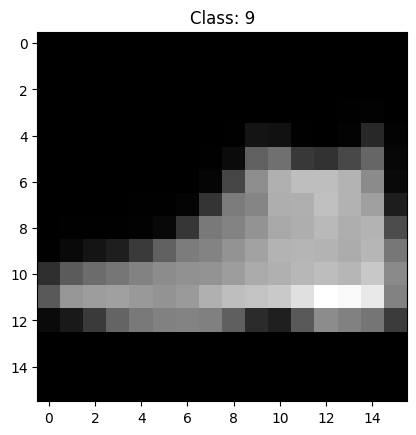

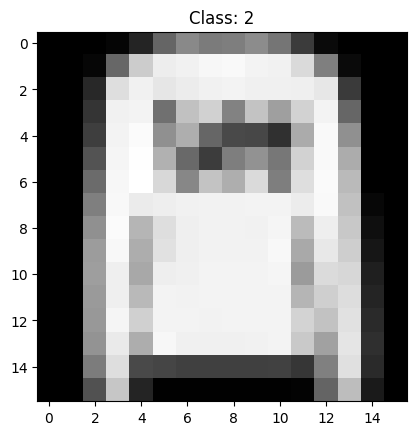

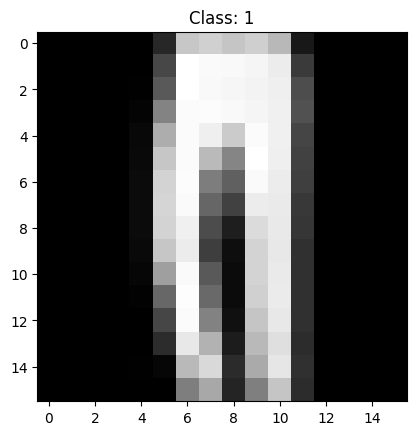

In [5]:
# Display first 3 samples
for n, data_sample in enumerate(dataset_val):
    show_data(data_sample)
    plt.show()
    if n == 2:
        break

<h3>Create Data Loaders</h3>

<p>Data loaders help batch and shuffle our data:</p>

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100)

<h3>Building the CNN Model</h3>

<p>We'll create a CNN with:</p>
<ul>
    <li>Two convolutional layers</li>
    <li>Batch normalization</li>
    <li>Max pooling</li>
    <li>Fully connected layer</li>
</ul>

In [7]:
class CNN_batch(nn.Module):
    def __init__(self, out_1=16, out_2=32, num_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(out_2 * 4 * 4, num_classes)
        self.bn_fc1 = nn.BatchNorm1d(num_classes)

    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)

        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        return x

<h3> Initialize Model and Optimizer</h3>

In [8]:
# Create model instance
model = CNN_batch(out_1=16, out_2=32, num_classes=10)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN_batch(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
  (bn_fc1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

<h3>Train the Model</h3>

<p>Now let's train our model:</p>

In [9]:
import time

# Track training progress
cost_list = []
accuracy_list = []
N_test = len(dataset_val)
n_epochs = 5

start_time = time.time()

for epoch in range(n_epochs):
    cost = 0
    model.train()

    # Training loop
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost += loss.item()

    # Validation
    correct = 0
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()

    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

    print(f"Epoch {epoch+1}/{n_epochs}, Cost: {cost:.2f}, Accuracy: {accuracy:.2%}")

print(f"Training completed in {time.time()-start_time:.2f} seconds")

Epoch 1/5, Cost: 297.13, Accuracy: 86.30%
Epoch 2/5, Cost: 208.43, Accuracy: 87.12%
Epoch 3/5, Cost: 187.19, Accuracy: 87.25%
Epoch 4/5, Cost: 173.89, Accuracy: 87.19%
Epoch 5/5, Cost: 164.16, Accuracy: 87.70%
Training completed in 160.65 seconds


<h3>Visualizing Results</h3>

<p>Let's plot the training cost and accuracy:</p>

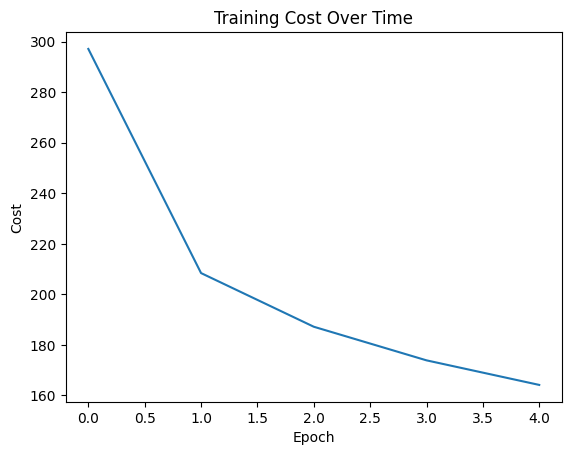

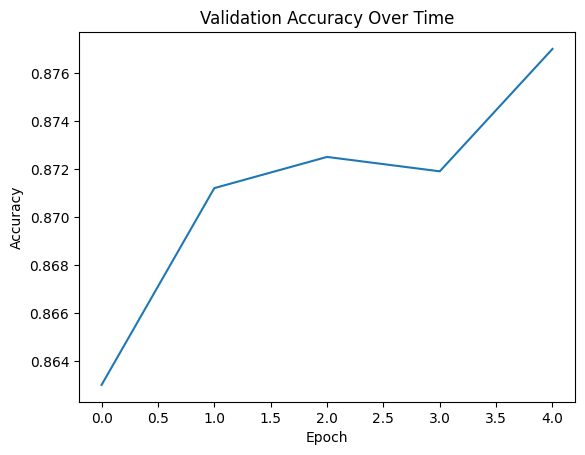

In [10]:
# Plot training cost
plt.plot(cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Cost Over Time')
plt.show()

# Plot accuracy
plt.plot(accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Time')
plt.show()

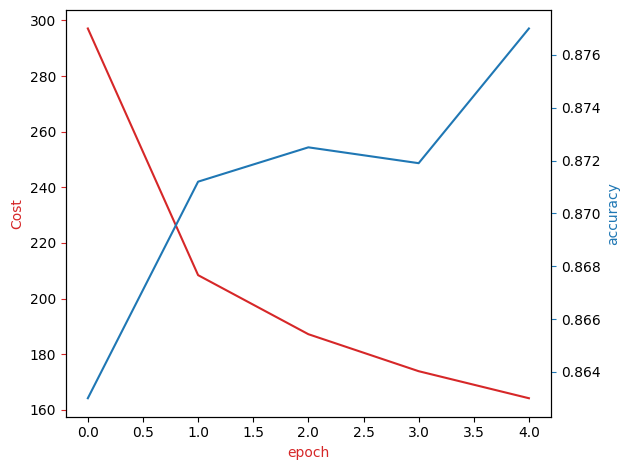

In [12]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

<h3>Testing the Model</h3>

<p>Let's test our model on some validation samples:</p>

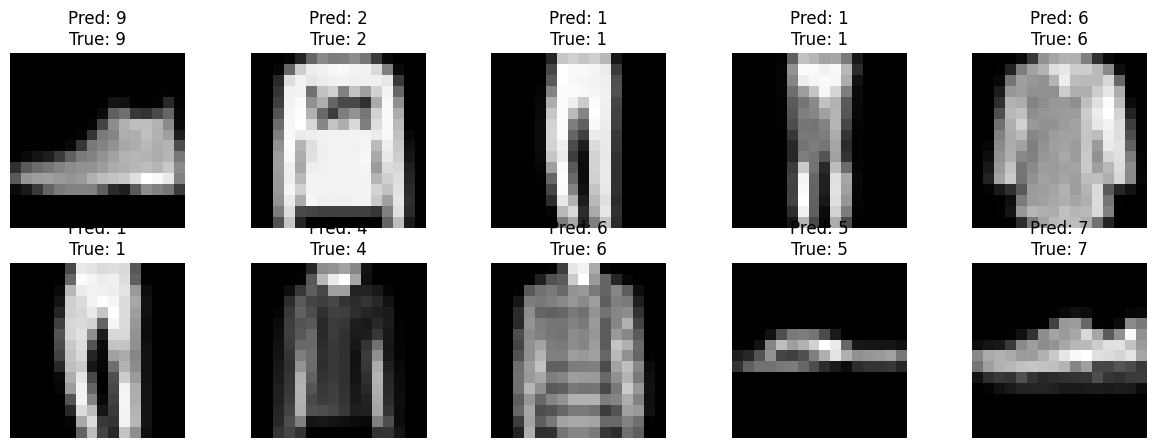

In [13]:
# Set model to evaluation mode
model.eval()

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Make predictions
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

# Plot some results
fig = plt.figure(figsize=(15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(images[i].cpu().numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    ax.set_title(f'Pred: {predicted[i].item()}\nTrue: {labels[i].item()}')
    ax.axis('off')
plt.show()

<h3>Improving the Model</h3>

<p>Here are some ways to potentially improve performance:</p>

<ol>
  <li>
    <b>Increase model complexity:</b>
    <ul>
      <li>Add more convolutional layers</li>
      <li>Increase number of filters</li>
      <li>Add dropout layers</li>
    </ul>
  </li>
  <li>
    <b>Adjust training parameters:</b>
    <ul>
      <li>Try different learning rates</li>
      <li>Increase number of epochs</li>
      <li>Use learning rate scheduling</li>
    </ul>
  </li>
  <li>
    <b>Data augmentation:</b>
    <ul>
      <li>Add random rotations/flips</li>
      <li>Adjust brightness/contrast</li>
    </ul>
  </li>
</ol>

<p>Example with data augmentation:</p>


In [14]:
# New transforms with augmentation
augmented_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

# Reload datasets with augmentation
dataset_train_aug = dsets.FashionMNIST(
    root='.fashion/data',
    train=True,
    transform=augmented_transform,
    download=True
)

<h3>Saving and Loading the Model</h3>

<p>Save your trained model:</p>

In [15]:
torch.save(model.state_dict(), 'fashion_mnist_cnn.pth')

<p>Load a saved model:</p>

In [16]:
model = CNN_batch(out_1=16, out_2=32, num_classes=10)
model.load_state_dict(torch.load('fashion_mnist_cnn.pth'))
model.to(device)
model.eval()

CNN_batch(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
  (bn_fc1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

<h2>Conclusion</h2>

<p>In this project, we've:</p>
<ol>
    <li>Prepared the Fashion MNIST dataset</li>
    <li>Built a CNN with batch normalization</li>
    <li>Trained the model to classify fashion items</li>
    <li>Evaluated its performance</li>
    <li>Explored ways to improve the model</li>
</ol>
